# BASIC CONCEPTS ON DESCRIPTIVE STATISTICS AND STATISTICAL INFERENCE 
## Descriptive Analysis
Is a branch of statistics that summarises the characteristics of a data set. They are mainly
* measures of central tendency
* measures of variability(spread/dispersion)
* Frequency distribution

### Measures of central tendency
These refer to numbers that represent the middle of the data. The include **mean(arithmetic), median** and **mode**.

$$\text{mean}, \bar{x} =\sum_{i=1}^n \dfrac{x_i}{n}$$

* **mean**: The sum divided by the number of elements
* **median** the middle value when the values are arranged logically based on the magnitude
* **mode** the most common item
  
Let us consider the housing data. The data contains the census report of the households grouped in blocks in California. 

Column details:
* **longitute**: A measure of how far west a house is, a higher value is farther west
* **latitide**: A measure of how far north a house is; a higher vale is farther north
* **housing_median_age**: The median age of a house within a block; a lower number is a new building
* **total_rooms**: total number of rooms within a block
* **total_bedrooms**: total number of bedrooms within a block
* **population**: total number of people residing within a block
* **households**: Total number of households, a group of people residing within a home unit, for a block
* **median_income**: median income for households within a block of houses(measured in 10,000USD)
* **median_house_value**: median house value for households within a block(in USD)
* **ocean_Proximity**: Location of the house of the ocean or sea
t ocean/sea


In [1]:
#Load the libraries
#ensure that the graphics are displayed in the notebook, we use the magic function below
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats 

In [2]:
housing_data=pd.read_csv('housing.csv')
housing_data.head() ##see the first 2 rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing_data.shape #dimension

(20640, 10)

In [4]:
housing_data.shape[1]

10

In [5]:
housing_data.info() #view the data types of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
#It is evidet that total_bedrooms columns has missing values(None)

#### slicing

In [7]:
#get data for one row
housing_data['total_rooms'].shape #this is a Pandas series, 1 dimensional, 1 dimension

(20640,)

In [8]:
housing_data.total_rooms.head(2) # we can also get the above series using the dot notation, 1 dimension

0     880.0
1    7099.0
Name: total_rooms, dtype: float64

In [9]:
housing_data[['total_rooms']].head(1)  # this makes it possible to be two dimensional 

,total_rooms
0,880.0


In [10]:
##select many columns
housing_data[['total_rooms','total_bedrooms','population']].head(2)

,total_rooms,total_bedrooms,population
0,880.0,129.0,322.0
1,7099.0,1106.0,2401.0


In [11]:
# using .loc and iloc. iloc selects rows and columns by using integer positions while loc is by labels
housing_data.iloc[0:3,0:5] # seleacts all rows elements for the column 0,1,2,and 3

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms
0,-122.23,37.88,41.0,880.0,129.0
1,-122.22,37.86,21.0,7099.0,1106.0
2,-122.24,37.85,52.0,1467.0,190.0


In [12]:
housing_data.loc[1:2] #selects the row 2 to 3

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [13]:
housing_data.loc[0:3] #selects the first 4 rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY


In [14]:
housing_data.iloc[:,np.r_[0:3,5]].head(2) #selects columns that are not following on another

,longitude,latitude,housing_median_age,population
0,-122.23,37.88,41.0,322.0
1,-122.22,37.86,21.0,2401.0


#### Question 1
* Find the mean, median and mode population of the blocks
* Find the most common total number of rooms in the block

In [15]:
housing_data['total_rooms'].var()

4759445.105938626

In [16]:
print("mean= {}, median= {} ".format(round(housing_data['population'].mean(),2),housing_data['population'].median()))

mean= 1425.48, median= 1166.0 


In [17]:
housing_data['total_rooms'].mode()

0    1527.0
Name: total_rooms, dtype: float64

In [18]:
#use collections module to get the mode
from collections import Counter
dict_counter=Counter(housing_data['total_rooms'])
dict_counter.most_common(1)

[(1527.0, 18)]

In [19]:
a=np.array([13,25,25,24,13,12,23,12,17,25,34,23,23,22,23])
b=Counter(a)
c=Counter(a)
print(b)

Counter({23: 4, 25: 3, 13: 2, 12: 2, 24: 1, 17: 1, 34: 1, 22: 1})


In [20]:
b.get(23)

4

In [21]:
dict2={}
for i in a:
    dict2[i]=dict2.get(i,0)+1
max(dict2.values())



4

In [22]:
# use the dictionary to get the mode. Create the dictionary and get the most common
dict1={}
for number in housing_data['total_rooms']:
    dict1[number]=dict1.get(number,0)+1
high_frequency=max(dict1.values())
type(high_frequency)

int

In [23]:
#Use for loop extract the key with the highest value given the dictionary value
for k,v in dict1.items():
    if dict1[k]== high_frequency:
        print(k)

1527.0


In [24]:
#Use list comprehension to print the key(total rooms) with the highest frequency
most_frequent=[k for k,v in dict1.items() if dict1[k]==high_frequency] 
print(high_frequency)
print(most_frequent)

18
[1527.0]


### Measures of dispersion

* **Range**: How far is a spread of values between the largest and the smallest one; It is the difference between the highest value and the lowest value in the data
* **quartiles**: values that divide logically arranged data into four parts with the same number of items. The data must be arranged in ascending order
    * *1st quartile*, the value between the first and the second quarters
    * *2nd quartile* is the value between the second and third quarters. This is the median
    * *3rd quartile*, the value between the third and the fourth quarters
* **percentile**: values that divide logically arranged data into 100 parts with the same number of items. The data must be arranged in ascending order
* **Interquartile range**: the difference between the 1st and third quartile
* **Standard deviation**: A measure of distribution of data around the mean.
* **Variance**: Is a measure of how data points vary from the mean. This is closely related to the standard deviation. Both standard deviation and variance almost represent a similar concept but are used differently in application.
* **Kurtosis,*k***: Is a measure of how tailed(peaked) the distribution is with respect to the normal distribution. For a normal distribution, *k=3*. When *k>3* the distribution has thin bell a high peak(**Leptokurtic**) and when *k<3* the distribution has a thick bell with a low peak  peaked(**platykurtic**)  
* **Skewness,s**: The measure of symmetrical behavior of a distribution. For a normal distribution, *s=0*. When the distribution is skewed to the left, **negatively skewed** , (the long tail is to the left), *$s < 0$* and when the distribution is skewed to the right **positively skewed** (the long tail is to the right), *$s > 0$*  

#### Question 2
* Find the range of the number of rooms among the blocks
* Find the quartiles and the inter-quartile range of the number of rooms among the blocks
* Find the lowest value of the median income of the 5% top highest earners in the blocks
* Find the variance and standard deviation of the median income among the blocks
* Find the kurtosis and skewness of the distribution of the median income

In [25]:
housing_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [26]:
#range
housing_data['total_rooms'].max() -(housing_data['total_rooms'].min())

39318.0

In [27]:
#quartiles
q1,q2,q3=np.percentile(housing_data['total_rooms'],[25,50,75]) #this is tuple unpaking, we create tuple on the right then npack it(asign it values on the right)
print("q1={}, q2={}, q3={}".format(q1,q2,q3)) 

q1=1447.75, q2=2127.0, q3=3148.0


In [28]:
#interquatile range
interq_s=q3-q1
interq_s

1700.25

In [29]:
#lowest of top 5% is 95% percentile. We order the column ascending then get the 95% percentile
m_income=housing_data['median_income'].sort_values() #sor values ascending, if descening, we use .sort_values(asceding=False)
np.percentile(m_income,95)

7.300305

In [30]:
#using assert method to show that the 96% percentile is less than 95%. This is to ensure that you are on the track
assert np.percentile(m_income,96) > np.percentile(m_income,95) 

In [31]:
#variance and standard deviation
round(housing_data.median_income.std(),4) #round to 4 decimal places

1.8998

In [32]:
round(housing_data['median_income'].std(),4)

1.8998

In [33]:
#variance
round(housing_data['median_income'].var(),4)

3.6093

In [34]:
#kurtosis
round(housing_data['median_income'].kurtosis(),3)

4.953

In [35]:
round(housing_data['median_income'].skew(),3)

1.647

In [36]:
a1,a2,a3=np.percentile(housing_data['median_income'],[25,50,75])
IQR_a=a3-a1

## outliers
They are points that significantly differ from others. 
In practical application, they are taken to be
* less than 5% and more than 95% in a normal distribution
* less than Q1-1.5IQR or more than Q3+1.5IQR
* significantly outside the trend of the general distribution of the data 

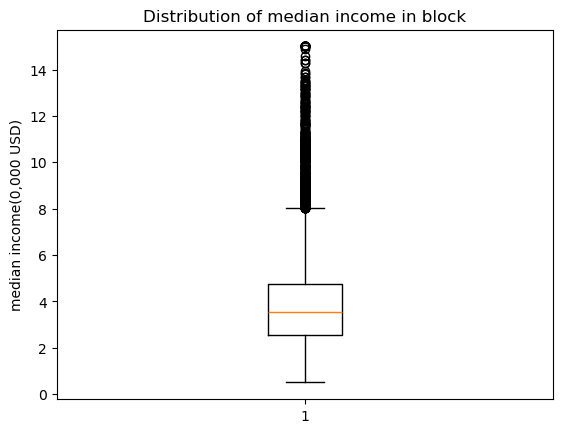

In [37]:
#By using the box plot, we can identify the outliers
plt.boxplot(housing_data['median_income'])
plt.ylabel('median income(0,000 USD)')
plt.title('Distribution of median income in block')
plt.show()
# see notice many outliers above the upper whisker

In [38]:
qq1,qq2,qq3=np.percentile(housing_data['median_income'],[25,50,75])
lower_whisker=qq1-(1.5*(qq3-qq1))
upper_whisker=qq3+(1.5*(qq3-qq1))
#compute the outlier
outl_low=housing_data['median_income'][housing_data['median_income']< lower_whisker]
outl_hig=housing_data['median_income'][housing_data['median_income']> upper_whisker]

In [39]:
housing_data['median_income'][housing_data['median_income']>upper_whisker]

0         8.3252
1         8.3014
131      11.6017
134       8.2049
135       8.4010
          ...   
20426    10.0472
20427     8.6499
20428     8.7288
20436    12.5420
20503     8.2787
Name: median_income, Length: 681, dtype: float64

In [40]:
lower_whisker

-0.7063750000000004

In [41]:
outl_low.size #none of then

0

In [42]:
outl_hig.size #681 outliers

681

### Frequency distributions
We can create tables for frequency distributions the represent them on graphs such as bar graphs, histograms,pie charts among others

### Common Visualizations

Create a frequency distribution table showing the ocean proximity for various block

In [43]:
housing_data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [44]:
block_locs=housing_data['ocean_proximity'].unique().tolist()
block_locs

['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']

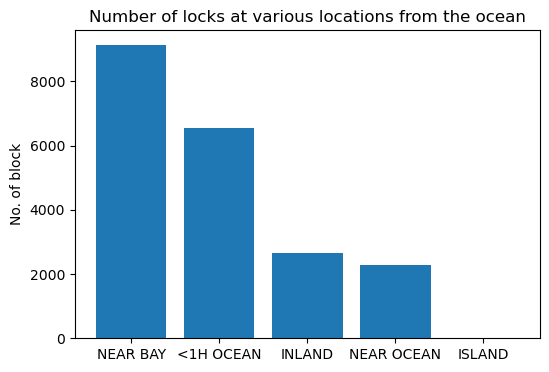

In [45]:
#create a bar graph for this data
fig,ax=plt.subplots(figsize=(6,4))
plt.bar(block_locs,housing_data['ocean_proximity'].value_counts(),width=0.8)
plt.title('Number of locks at various locations from the ocean')
plt.ylabel('No. of block')
plt.show();


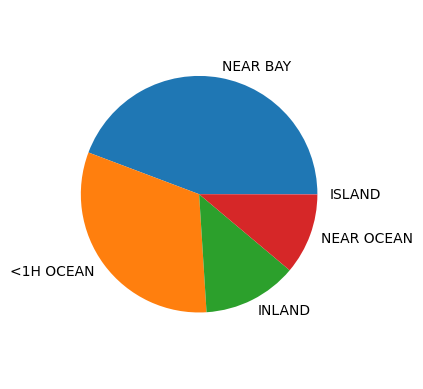

In [46]:
#pie chart
plt.pie(housing_data['ocean_proximity'].value_counts(),labels=block_locs,startangle=0,radius=0.8);

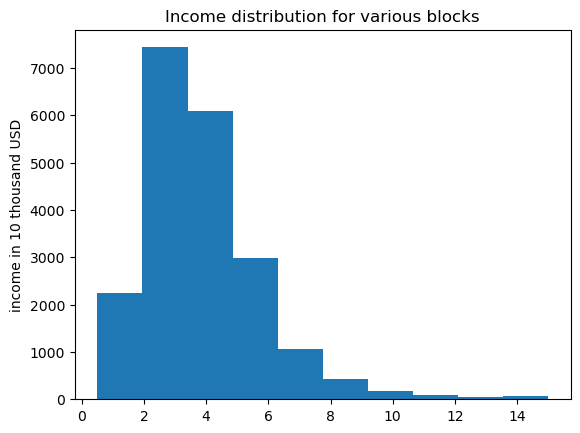

In [47]:
#create a histogram for the income distributions
plt.hist(housing_data['median_income'],bins=10)
plt.ylabel('income in 10 thousand USD')
plt.title('Income distribution for various blocks')
plt.show();


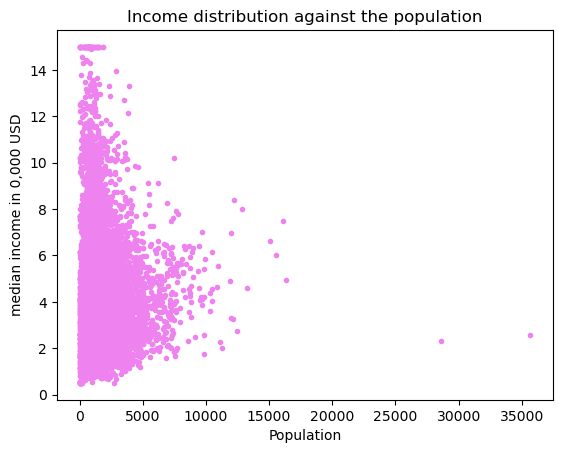

In [48]:
#create a scatter plot for income against the population
plt.scatter(housing_data['population'],housing_data['median_income'],marker='.',color='violet');
plt.xlabel('Population')
plt.ylabel('median income in 0,000 USD')
plt.title('Income distribution against the population')
plt.show();

# Statistical Inference
In this case, we focus on test of Hypothesis and confidence interval

Inference implies generalizing the results from a sample to the whole population under study. We make an assumption that the sample was randomly generated and is unbiased.

Statistical inference makes use of the normal distribution which is a doomed-shaped symmetrical distribution whose mean and median are equal. The probability density distribution**(pdf)** for normal distribution is
$$f(x,\mu,\sigma)=\dfrac{1}{\sigma \sqrt{2\pi}}e^{-\dfrac{1}{2}\left(\dfrac{x-\mu}{\sigma}\right)^2}$$
where $x$ is a variable, $\mu$ is the mean and $\sigma$ is the standard deviation of the distribution.
To apply normal distribution easily, we transform the pdf into a distribution with a $\mu=0$ and $\sigma_1$. This distribution is called a standard normal ditribution whose pdf is 
$$f(z)=\dfrac{1}{\sqrt{2\pi}}e^{-\dfrac{1}{2}z^2}$$
and transformation is 
$$z=\dfrac{x-\mu}{\sigma}$$
called the $z$-score.

Given the value of $z$, we can find the cumulative probability distribution that $P(z \leq z_a)$ where $z_a$ is the $z$-score.


### Question 3

A scientist researched the amount of scores university students can score in an amplitude test. The average score of the students was 54\% with a standard deviation of 6.3. The score was online, and University students were selected to attempt the test. Assuming that the distribution of the score was normal, what is the probability that a student will score
* less than 50%
* more than 63%
* Between 59% and 69%

We use the scipy's stats module

Let $X$ be a random variable representing the score of a standard and $Z$ be the score

We find $P(X \leq 50)$

In [49]:
#P(X<=50)
z_50 =(50-54)/6.3
p_less_50=stats.norm.cdf(z_50)
round(p_less_50,4)

0.2627

In [50]:
#P(X>=63)
z_63 =(63-54)/6.3
p_more_63=1-stats.norm.cdf(z_63)
round(p_more_63,4)

0.0766

In [51]:
#P(59<X<69)
z_69 =(69-54)/6.3
z_59 =(59-54)/6.3
p_btn_69_59=stats.norm.cdf(z_69) - stats.norm.cdf(z_59)
round(p_btn_69_59,4)

0.2051

## Confidence interval
The confidence interval estimates the population parameter given a sample statistic. The confidence interval is a range within which we are sure that the population parameter will lie to a certain probability. The 95\% confidence interval for a population mean $\mu$ is
$$\left(\bar{x} - Z_{\alpha/2} \dfrac{\sigma}{\sqrt{n}}, \bar{x} + Z_{\alpha/2} \dfrac{\sigma}{\sqrt{n}}\right)$$
or $$\bar{x} \pm Z_{\alpha/2} \dfrac{\sigma}{\sqrt{n}}$$

The number $Z_{\alpha/2} \dfrac{\sigma}{\sqrt{n}}$ is called the marginal error

Note/: The sampling distribution of the mean whose population standard deviation is $\sigma$, the standard error(standard deviation of the sample) is $\sqrt{\dfrac{\sigma^2}{n}}=\dfrac{\sigma}{\sqrt{n}}$ where $n$ is the sample size. By central limit theorem, for larger values of $n$, the standard deviation approached $\sigma$ irrespective of the underlaying distribution. 

In the above question, what would be 95\% confidence interval for the mean of 54\% for a sample size of 100.

The level of significance is $1-0.95 = 0.05=\alpha$. When the sample size is more than 30, the distribution is approximately normal, hence we use the Z-score. 

**The confidence interval for the proportion**
$$\left(\hat{p} - Z_{\alpha/2} \sqrt{\dfrac{\hat{p}\hat{q}}{n}}, \hat{p} + Z_{\alpha/2} \sqrt{\dfrac{\hat{p}\hat{q}}{n}}\right)$$
or $$\hat{p} \pm Z_{\alpha/2} \sqrt{\dfrac{\hat{p}\hat{q}}{n}}$$


In [52]:
sample_size=100
std_dev=6.3
mean_s=54
z_alpha_half=stats.norm.ppf(0.975)
z_alpha_half

1.959963984540054

In [54]:
error_margin=z_alpha_half*std_dev/np.sqrt(sample_size)
print("Confidence interval:({},{})".format(round(mean_s-error_margin,2),round(mean_s+error_margin,2)))

Confidence interval:(52.77,55.23)


## Hypothesis test
We can also test if a value satisfies a certain condition. For instance, we may test if the population mean is equal to  51, more than 51 or less than 51 with a specific accuracy level. This statement provides 3 different cases of hypothesis test. 

First, we formula the hypothesis statements. We have two, the **null hypothesis** and the **alternative hypothesis**. The **null** hypothesis,$H_0$, is a statement that represents the claim, current situation or existing information that has to be disproved or not while the **alternative** hypothesis,$H_1$, represents a new situation or information that will be determined given sufficient evidence.
If a simple random sample from the population is done, we would like to determine if;
1. mean is equal to  51
   
   $H_0: \mu=51$
   
   $H_1: \mu \neq 51$   
   This is a two-tailedd test.
   
   $H_0: \mu=51$
   
   $H_1: \mu < 51$   
   This is a one left tail test.

   $H_0: \mu=51$
   
   $H_1: \mu > 51$
   This is a one right tail test.

   We reject the null hypothesis if positive of p_value < alpha
2. mean is less than  51
   
   $H_0: \mu < 51$
   
   $H_1: \mu \geq 51$
   This is a one-right-tail test.

   We reject the null hypothesis if positive of p_value < alpha
   
3. mean is more than  51
   
   $H_0: \mu > 51$
   
   $H_1: \mu \leq 51$   This is a one-left-tail test.
   
   We reject the null hypothesis if positive of p_value < alpha

In both cases, for $n>0$, the test statistics is
$$z=\dfrac{\mu_0 -\mu}{\sigma/\sqrt{n}}$$
Where $n$ is the sample size and $\mu_0$ is value being compared to in the hypothesis statement. In our case, we will be using Z-statistics(score) because we will be working with sample sizes more than 30. In a situation where the sample size is less than 30, we use the t-statistic

**Example: Using a significance level of $\alpha =0.01(99%)$, test whether the the population mean is less than 51%, n=100**

**Example: Using a significance level of $\alpha =0.01(99%)$, test whether the the population mean is equal to 51%, n=100**

In [55]:
#Using a significance level of \alpha =0.01(99%), test whether the the population mean is equal to 51%, n=100
alpha=0.01
test_mean=51
mean_s=54
std_dev=6.3
sample_size=100
test_statistic= (test_mean-mean_s)/(std_dev/np.sqrt(sample_size))
test_statistic
p_value=stats.norm.cdf(test_statistic)
p_value

9.58870944497607e-07

In [56]:
p_value < 0.005 # if mu_0 != 51

True

In [57]:
p_value < 0.01  #if mu_0 <51%

True

In [58]:
#Using a significance level of \alpha =0.01(99%), test whether the the population mean is less than 51%, n=100
alpha=0.01
test_mean=51
test_statistic=(test_mean-mean_s)/(std_dev/np.sqrt(sample_size))
p_value=stats.norm.cdf(test_statistic)

if p_value < alpha:
    print('reject the null hypothesis in faviour of the alternative hypothesis')
else:
    print('There is no enough evidence to reject the null hypothesis, hence, the null hypothesis is true')



reject the null hypothesis in faviour of the alternative hypothesis


In [59]:
def test_less_than(alpha,test_mean,mean_s,std,sample_size):
    test_statistic=(test_mean-mean_s)/(std/np.sqrt(sample_size))
    p_value=stats.norm.cdf(test_statistic)
    if p_value < alpha:
        return 'reject the null hypothesis in faviour of the alternative hypothesis'
    else:
        return 'There is no enough evidence to reject the null hypothesis, hence, the null hypothesis is true'

In [60]:
test_less_than(0.01,51,54,6.3,100)

'reject the null hypothesis in faviour of the alternative hypothesis'

In [61]:
housing_data['total_rooms'].mean()

2635.7630813953488